# Unsupervised Learning

Advantages: 
   
   Won't be influenced by the bias from the limited supervised data,
            
   Doesn't need data to be labeled, effectively expanding the sample size

## 1)KMeans cluster

{Category based on the distance of the data from the center point

Update centroids based on category data}

Loop the process until convergence

### feature
quick convergence, need to set the number of cluster first

## 2)Meanshift
{Retrieve data points in a certain area of the center point

update the center point}

Loop until the center point is stable

### feature
   automatically discover the number of cluster, need to set the radius of the region

### Main commands
calculate the radius

from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X,samples =  500)

train the model

ms=MeanShift(bandwidth=bandwidth)
ms.fit(X)

## KMeans Analysis
Clustering is performed by centering on K points in the space and grouping the objects by the closest distance.

Function: dist(x<sub>i</sub>,u<sub>j</sub>^t)

### Steps
-Set two or more centers in the space

-Output the first Dividing Line(Data point finds the closest center point)

-Based on the dividing line, update the new center location for each region

-According to the new location of each center, calculate and output the new dividing line

-Loop until center points stop changing

### Label
Kmeans = Data are not labeled(Unsupervised learning)

KNN = Data are labeled（Supervised learning）

# Main commands
Train model

from sklearn.cluster import KMeans

KM = KMeans(n_cluster=3,random_state=0)

KM.fit(X)

get the center
centers = KM.cluster_centers_

# Algorithm Practice : solving problem

Use Kmeans to predict the label of V1=80 and V2=60

Estimate the accuracy rate

In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
#define X and y
X = data.drop(['labels'],axis = 1)
y = data.loc[:,'labels']
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

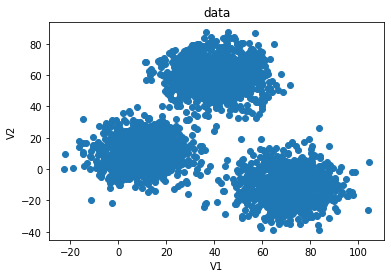

In [6]:
#view graph
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'V1'],X.loc[:,'V2'])
plt.title('data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

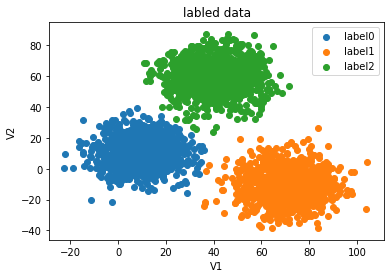

In [7]:
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [8]:
print(X.shape,y.shape)

(3000, 2) (3000,)


In [9]:
#set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
centers = KM.cluster_centers_

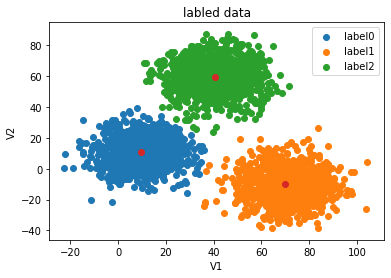

In [11]:
fig3 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [12]:
#test data: V1=80,V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)
#seems wrong!!!

[1]


In [17]:
#predict 
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))
#model is different from the original data (2,1,0)

1    1149
0     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


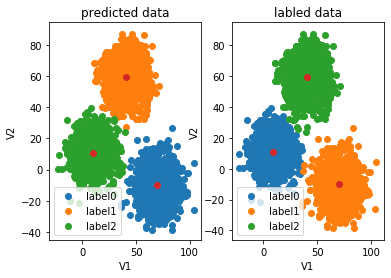

In [18]:
#visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])

plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

## Unsupervised Learning would encounter this incorrect labeling on the type of data since we haven't told the algorithm in the first place.

So we need to manually correct it

In [20]:
#correction
y_correct =[]
for i in y_predict:
    if i == 0:
        y_correct.append(1)
    elif i == 1:
        y_correct.append(2)
    else:
        y_correct.append(0)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_correct))

0.997


In [24]:
#change the data structure to graph
y_correct = np.array(y_correct)
print(type(y_correct))

<class 'numpy.ndarray'>


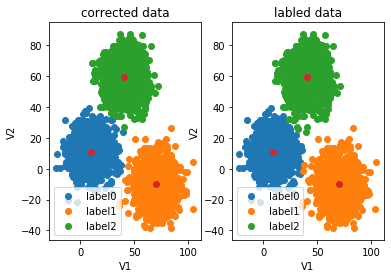

In [26]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_correct==0],X.loc[:,'V2'][y_correct==0])
label1 = plt.scatter(X.loc[:,'V1'][y_correct==1],X.loc[:,'V2'][y_correct==1])
label2 = plt.scatter(X.loc[:,'V1'][y_correct==2],X.loc[:,'V2'][y_correct==2])

plt.title("corrected data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

## Tip
In big data, sometime the data can't be completetly labeled, so we could apply unsupervised learning first to see the pattern of clusters and then infer the type of each cluster by the background information